In [17]:
import numpy as np
import pandas as pd
import numpy.random as npr
import matplotlib.pyplot as plt

from scipy.stats import norm

# Exer

In [18]:
def European_call_MC_Average(r, S0, sigma, T, K, N):
    
    WT1 = np.sqrt(T)*npr.normal(0,1,(N,1))
    WT2 = np.sqrt(T)*npr.normal(0,1,(N,1))
    ST1 = S0*np.exp( sigma*WT1 + (r-0.5*sigma**2)*T)
    ST2 = S0*np.exp( sigma*WT2 + (r-0.5*sigma**2)*T)

    payoff = np.exp(-r*T)*np.maximum((ST1+ST2)/2 - K, 0)
    
    price  = np.mean(payoff)
    std    = np.std(payoff)
    CI_up   = price +1.96*std/np.sqrt(N)     
    CI_down = price -1.96*std/np.sqrt(N)
    error   = 1.96*std/np.sqrt(N)
    
    return {'price':price, 'error':error, 'CI_up':CI_up, 'CI_down':CI_down}

European_call_MC_Average(
    r=0.01,
    S0=100,
    sigma=0.2,
    T=1, # one year
    K=100,
    N=10000
)

{'price': 6.1566657064859855,
 'error': 0.18431573428442288,
 'CI_up': 6.340981440770409,
 'CI_down': 5.972349972201562}

In [68]:
def European_call_MC_Average_IS(r, S0, sigma, T, K, N,
                                IS1_min, IS1_max, IS2_min, IS2_max, resolution):
    # ISX_max/min are the bounds for the graph
    # resolution is the resolution of the graph
    
    lamb1_vals = [IS1_min + k*(IS1_max-IS1_min)/resolution for k in range(resolution+1)]
    lamb2_vals = [IS2_min + k*(IS2_max-IS2_min)/resolution for k in range(resolution+1)]
    
    error_matrix = np.zeros((resolution+1, resolution+1))
    
    for i in range(resolution + 1):
        lamb1 = lamb1_vals[i]
        for j in range(resolution + 1):
            lamb2 = lamb2_vals[j]
            
            G1 = npr.normal(0,1,(N,1))
            WT1 = np.sqrt(T)*(G1 + lamb1)
            G2 = npr.normal(0,1,(N,1))
            WT2 = np.sqrt(T)*(G2 + lamb2)
            
            ST1 = S0*np.exp( sigma*WT1 + (r-0.5*sigma**2)*T)
            ST2 = S0*np.exp( sigma*WT2 + (r-0.5*sigma**2)*T)

            payoff = np.exp(
                -r*T
            )*np.exp(
                -lamb1*G1 - lamb1**2/2 - lamb2*G2 - lamb2**2/2
            )*np.maximum((ST1+ST2)/2 - K, 0)
            
            std    = np.std(payoff)
            error_matrix[i, j] = std
    
    return pd.DataFrame(
        columns=lamb2_vals,
        index=lamb1_vals,
        data=error_matrix
    )

plot_data = European_call_MC_Average_IS(
    r=0.01,
    S0=100,
    sigma=0.2,
    T=1, # one year
    K=100,
    N=1000000,
    IS1_min=0, 
    IS1_max=1.5,
    IS2_min=0,
    IS2_max=1.5,
    resolution=15
)
plot_data

,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2,1.3,1.4,1.5
0.0,9.360852,8.659713,8.074398,7.627791,7.313406,7.106552,7.022265,7.081728,7.256245,7.530137,7.969151,8.428182,9.294104,10.076128,11.155279,12.289139
0.1,8.644424,7.932958,7.340669,6.879865,6.544198,6.318941,6.225476,6.206005,6.365626,6.618154,7.004302,7.500081,8.098486,8.856683,9.710486,11.034321
0.2,8.078588,7.352731,6.748034,6.255973,5.898023,5.648158,5.508380,5.496181,5.583933,5.820616,6.182197,6.653459,7.271472,8.007721,8.933072,10.065807
0.3,7.621816,6.882815,6.256965,5.751319,5.353243,5.071987,4.915051,4.858498,4.930240,5.120813,5.460049,5.846172,6.420125,7.139975,7.969885,8.800892
0.4,7.310116,6.544564,5.899476,5.351856,4.921421,4.605762,4.405547,4.324004,4.368238,4.540389,4.819513,5.226867,5.776517,6.429501,7.114017,7.952092
0.5,7.114605,6.325256,5.642645,5.074557,4.604791,4.249622,4.012805,3.898899,3.905106,4.052692,4.332301,4.685769,5.161827,5.802300,6.606957,7.490450
0.6,7.025418,6.233217,5.511672,4.906575,4.402920,4.006785,3.731558,3.576336,3.550032,3.666611,3.903023,4.278528,4.772772,5.322749,6.000441,6.858036
0.7,7.085669,6.240652,5.497076,4.870179,4.329213,3.896810,3.574728,3.377819,3.315089,3.396176,3.596468,3.938621,4.364033,4.940301,5.639847,6.448586
0.8,7.207180,6.352806,5.600594,4.936049,4.371178,3.907680,3.556222,3.314117,3.209945,3.245534,3.415405,3.724967,4.145576,4.692757,5.302401,6.097853
0.9,7.550541,6.623969,5.825753,5.119803,4.539283,4.040501,3.667690,3.384091,3.246317,3.239586,3.370009,3.636828,4.026870,4.534500,5.139264,5.861351


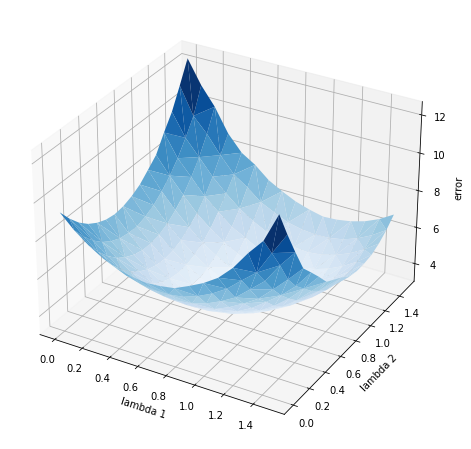

In [71]:
from matplotlib import cm

fig = plt.figure(figsize=(8,8))
plot_data_coords = plot_data.stack().reset_index()
ax = plt.axes(projection='3d')
ax.plot_trisurf(
    plot_data_coords['level_0'].values,
    plot_data_coords['level_1'].values,
    plot_data_coords[0].values,
    cmap=cm.Blues
)
ax.set_xlabel('lambda 1')
ax.set_ylabel('lambda 2')
ax.set_zlabel('error')
#plt.savefig('question 1.3.png', bbox_inches='tight', dpi=200)
plt.show()